# K-mean

In [32]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


#Generer des données synthetiques
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)


# Appliquer StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


print("Moyenne après normalisation:", scaled_features.mean(axis=0))
print("Écart type après normalisation:", scaled_features.std(axis=0))


Moyenne après normalisation: [9.82547377e-17 4.91273688e-17]
Écart type après normalisation: [1. 1.]


In [9]:
#Générations des clusters
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [10]:
#SSE - Somme des carrés des erreurs
inertia_value = kmeans.inertia_
print("Inertie (SSE):", inertia_value)

#  Centres des clusters
cluster_centers = kmeans.cluster_centers_
print("Centres des clusters:")
print(cluster_centers)

#  Nombre d'itérations pour converger
n_iterations = kmeans.n_iter_
print("Nombre d'itérations pour converger:", n_iterations)

#Labels des cinq premières données
cluster_labels_first_5 = kmeans.labels_[:5]
print("Labels des cinq premières données:", cluster_labels_first_5)

a) Inertie (SSE): 74.57960106819854
b) Centres des clusters:
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
c) Nombre d'itérations pour converger: 10
d) Labels des cinq premières données: [0 1 2 2 2]


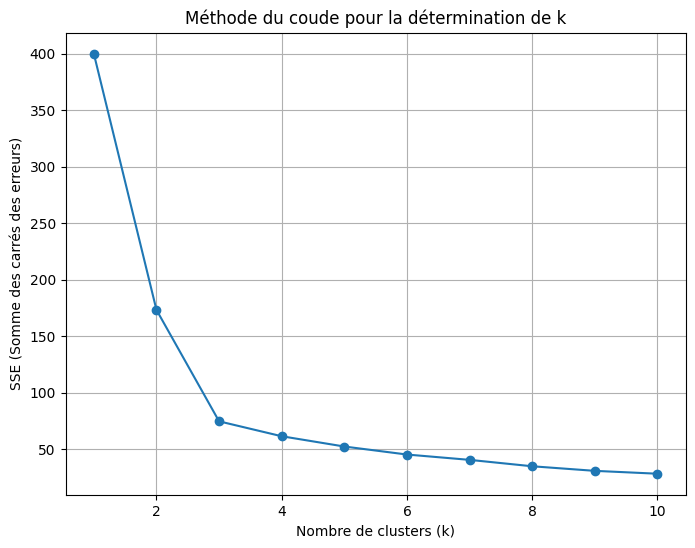

In [33]:
# Methode Elbow
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Tracer le graphique du SSE en fonction du nombre de clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du coude pour la détermination de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('SSE (Somme des carrés des erreurs)')
plt.grid()
plt.show()

In [14]:
kl = KneeLocator( range(1, 11), sse, curve="convex",direction="decreasing")
print("la valeur de k est :",kl.elbow)

la valeur de k est : 3


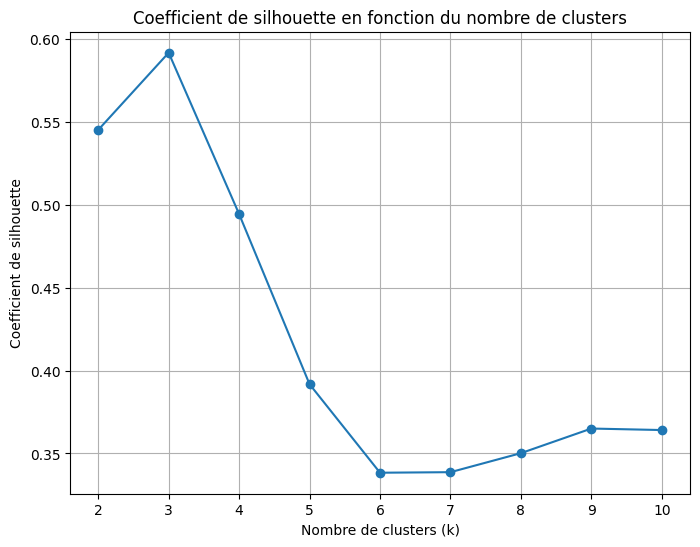

In [29]:
#Optimisation des clusters : Coefficient de silhouette

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Tracer le graphique du coefficient de silhouette en fonction du nombre de clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

# Classification Ascendante Hiérarchique

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
#charger iris
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X)
print(X)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [20]:
#calcul de la matrice de distance
Z = linkage(X, method="ward")
print (Z)

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

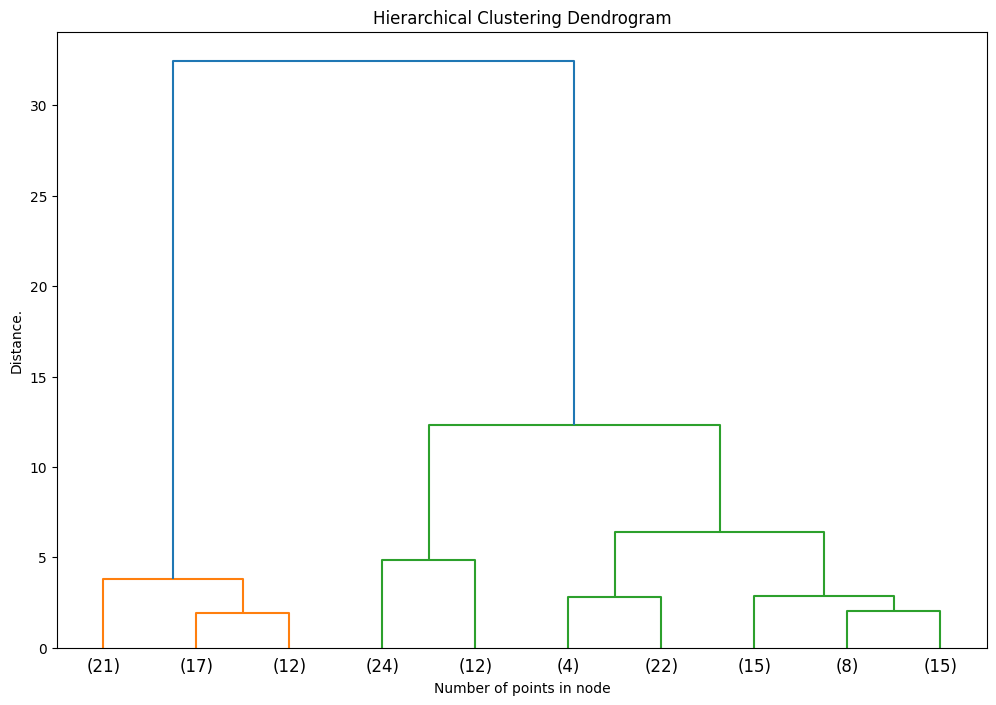

In [38]:
#affichage de dendogramme
ig, ax = plt.subplots(1, 1, figsize=(12, 8))
D = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.ylabel("Distance.")
plt.show()